# Wstęp teoretyczny

Na wykładzie omawiana była wizualizacja danych. Zaczelismy od biblioteki ```matlotlib```, ktora służy do wizualizacji miedzy innymi wykresow w 2D i 3D, histogramów, wykresów słupkowych i wiele innych. Jest to bardzo potęzna bibloteka.  
Importujemy:
```python 
import matplotlib as mpl
import matplotlib.pyplot as plt
```
Aby narysować wykres używamy 
```python
plt.plot(x, y, *args, *kwargs) i plt.show()
```
Można również tworzyc macierze wykresów za pomocą ```plt.subplot()```  podając odpowiednie współrzędne wykresów w trakcie ich implemetacji.

Możemy rownież zapisać naszą figure za pomocą ```plt.savefig("Nazwa.rozsz")```.

Nasz wykres można modyfikować na przykład pod względem koloru lini bądź krztałtu poprzez modyfikacje argumentu  
```color="blue"``` i ```linestyle = "solid"```

Jak również podpisać osie wykresów ```plt.xlabel()/plt.ylabel()```. 

Poniżej przedstawie kilka przydatnych funkcji do rysowania wykresów:

* plt.pie() - wykres kołowy,
* plt.bar() - wykres słupkowy,
* plt.hist() - histogram,
* plt.boxplot() - wykres skrzynkowy,
* plt.contour() - wykres konturowy





# Zadanie 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy.stats import iqr
import math

In [19]:
sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.9)

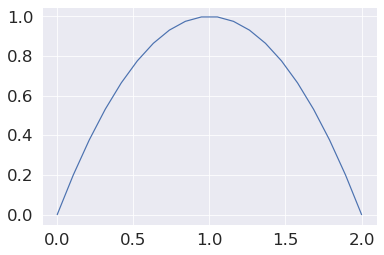

In [42]:
x = np.linspace(0, 2, 20)
y = x*(2-x)
plt.plot(x, y)
plt.show()

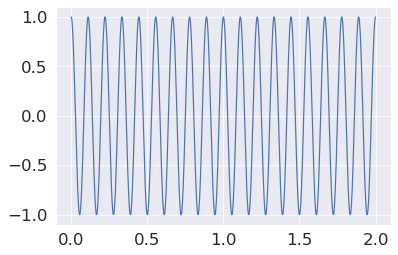

In [21]:
x = np.linspace(0, 2, 1000)
y = np.cos(18*np.pi*x)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

Proste przedstawienie funkcjonalności matplota. Tu widac różnice w dopasowaniu punktów na wykresach.

# Zadanie 2

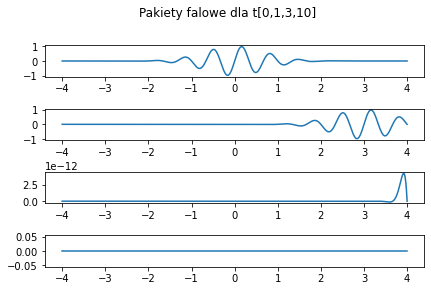

In [8]:
def f(x,t):
    return np.exp(-(x-3*t)**2)*np.sin((3*np.pi*(x-t)))

x = np.linspace(-4,4,1000)
t = [0,1,3,10]

fig, (ax1,ax2,ax3,ax4) =plt.subplots(4)
fig.suptitle('Pakiety falowe dla t[0,1,3,10]', y=1)
fig.tight_layout()
ax1.plot(x,f(x,t[0]))
ax2.plot(x,f(x,t[1]))
ax3.plot(x,f(x,t[2]))
ax4.plot(x,f(x,t[3]))
plt.show()

Macierz wykresów dla pakietu falowego w różnych przedziałach czasowych.

# Zadanie 3

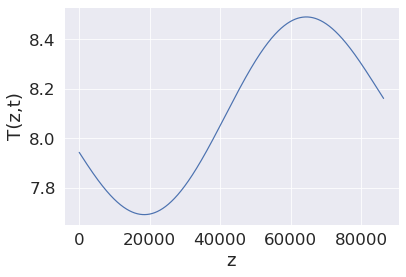

In [23]:
def T(z,t):
    return T_0+A_1*np.exp(-a_1*z)*np.sin(w_1*t-a_1*z)+A_2*np.exp(-a_2*z)*np.sin(w_2*t-a_2*z)

k=10**(-6) #(m*m/s)
A_1=15 # C
A_2=7 # C
z=0.5 #m
T_0=10 #C
p_1=31536000 #s
p_2=86400  #s
w_1=2*np.pi/p_1
w_2=2*np.pi/p_2
a_1=np.sqrt(w_1/(2*k))
a_2=np.sqrt(w_2/(2*k))

t = np.linspace(0,p_2,p_2)
plt.plot(t,T(0.5,t))
plt.xlabel("z")
plt.ylabel("T(z,t)")
plt.show()

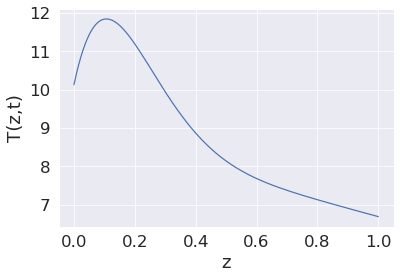

In [24]:
t2 = int(p_2/2)
z = np.linspace(0,1,t2)
plt.plot(z,T(z,t2))
plt.xlabel("z")
plt.ylabel("T(z,t)")
plt.show()

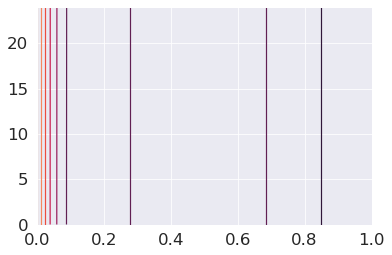

In [25]:
z=np.linspace(0,1,1000)
t=np.linspace(0,24,1000)
X, Y = np.meshgrid(z, t)
Z=T(X,Y)
plt.contour(X, Y, Z)
plt.show()

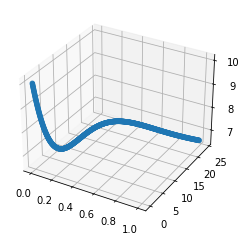

In [12]:
ax = plt.axes(projection='3d')
zline = z
xline = t
yline =T(z,t)

ax.scatter(z, t, T(z,t))
plt.show()

Tu mielismy okazje przedstawić funkcje na kilka sposobów. 

# Zadanie 4

In [26]:
def H(x,eps):
    a_1=(eps**(-2))/3

    a_2=-a_1

    d_1=1-eps+a_1*eps**3

    d_2=1-eps-a_2*eps**3

    b=c=0
    
    if x<0:
        return 0      
    if 0<=x and x<1-eps:
        return x
    if 1-eps<=x and x<1:
        return a_1*(x-1)**3+b*(x-1)+c*(x-1)+d_1
    if 1<=x and x<1+eps:
        return a_2*(x-1)**3+b*(x-1)+c*(x-1)+d_2
    if 1+eps<=x and x<2:
        return 2-x
    if x>=2:
        return 0
        


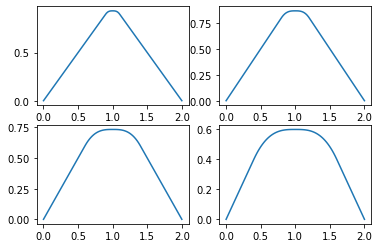

In [14]:
x = np.linspace(0,2,100)
VecH = np.vectorize(H)
plt.figure()
plt.xlabel("x")
plt.ylabel("H(x)")
plt.subplot(2,2,1)
plt.plot(x,VecH(x,0.1))
plt.subplot(2,2,2)
plt.plot(x,VecH(x,0.2))
plt.subplot(2,2,3)
plt.plot(x,VecH(x,0.4))
plt.subplot(2,2,4)
plt.plot(x,VecH(x,0.6))
plt.show()

Funkcja sklejana gdzie w macierzy wykresów widać że funkcja się zmienia przez zmiane wartości eps.

# Zadanie 5


In [5]:
data=pd.read_excel("Wynik_EKG.xlsx")
data

,Age,Sex,Height (cm),Weight (kg),QRS duration (ms),P-R interval (ms),Q-T interval (ms),T interval (sec),P interval (ms),Angle QRS (au),...,EKG-V6_2,EKG-V6_3,EKG-V6_4,EKG-V6_5,EKG-V6_6,EKG-V6_7,EKG-V6_8,EKG-V6_9,EKG-V6_10,Klasa
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [6]:
S=pd.DataFrame({'Sex':[0,1],'sex':['M','F']})
data=pd.merge(data,S)
data.Sex=data.sex
del data['sex']
data

,Age,Sex,Height (cm),Weight (kg),QRS duration (ms),P-R interval (ms),Q-T interval (ms),T interval (sec),P interval (ms),Angle QRS (au),...,EKG-V6_2,EKG-V6_3,EKG-V6_4,EKG-V6_5,EKG-V6_6,EKG-V6_7,EKG-V6_8,EKG-V6_9,EKG-V6_10,Klasa
0,75,M,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,54,M,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
2,55,M,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
3,75,M,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
4,13,M,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,41,F,154,75,88,157,384,132,112,65,...,-0.4,10.5,-2.5,0.0,0,0.5,1.4,17.8,29.5,10
448,20,F,157,57,81,151,363,166,80,43,...,0.0,7.2,-0.7,0.0,0,0.5,2.3,17.6,39.2,1
449,53,F,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
450,32,F,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [7]:
Klasa=pd.DataFrame({'Klasa':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'klasa':["zdrowy","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia","arytmia""arytmia","arytmia","arytmia","arytmia"]})
data=pd.merge(data,Klasa)
data

,Age,Sex,Height (cm),Weight (kg),QRS duration (ms),P-R interval (ms),Q-T interval (ms),T interval (sec),P interval (ms),Angle QRS (au),...,EKG-V6_3,EKG-V6_4,EKG-V6_5,EKG-V6_6,EKG-V6_7,EKG-V6_8,EKG-V6_9,EKG-V6_10,Klasa,klasa
0,75,M,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,arytmia
1,67,M,163,78,106,173,365,196,82,-73,...,4.2,-6.4,0.0,0,0.4,0.8,-12.0,-2.1,8,arytmia
2,54,M,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,arytmia
3,47,M,171,59,82,145,347,169,61,77,...,9.4,-1.7,0.0,0,0.6,2.3,19.5,41.1,10,arytmia
4,39,M,172,76,103,147,356,162,80,11,...,12.4,-2.1,0.0,0,0.5,0.6,23.6,28.5,10,arytmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,59,M,165,65,121,0,329,160,0,66,...,5.1,0.0,0.0,0,-0.4,-1.5,15.7,-0.8,15,arytmia
426,55,F,156,78,88,0,380,138,0,79,...,4.9,-1.2,0.0,0,-0.2,2.0,12.6,36.6,15,arytmia
427,66,F,160,60,73,0,364,144,0,27,...,4.4,-0.9,0.0,0,0.0,0.9,8.0,12.8,15,arytmia
428,49,F,166,87,78,0,322,122,0,70,...,7.0,0.0,0.0,0,-0.2,0.3,18.2,20.3,15,arytmia


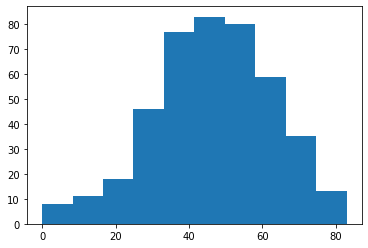

In [8]:
plt.hist(data["Age"])
plt.show()

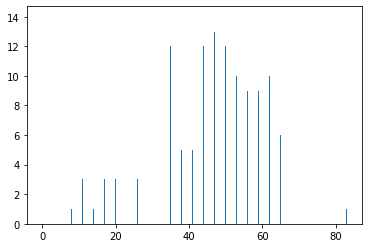

In [9]:
p=math.log(2,len(data))
plt.hist(data.Age, bins=int(len(data.Age)/p))
plt.show()

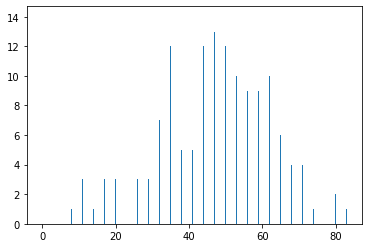

In [10]:
p2=(max(data.Age)-min(data.Age))/(2*iqr(data.Age)*len(data.Age)**(1/3))
plt.hist(data.Age, bins=int(len(data.Age)/p2))
plt.show()

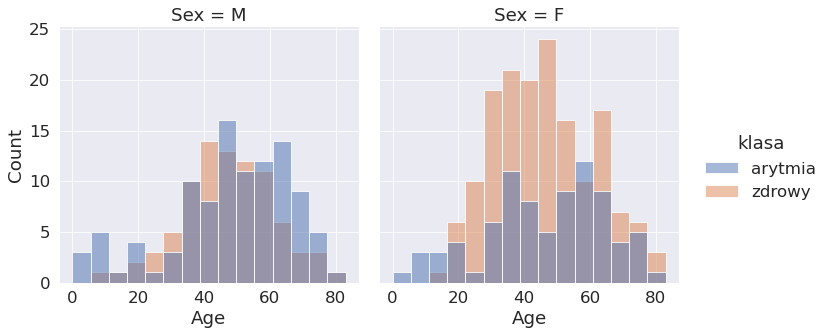

In [33]:
sns.displot( x="Age", hue="klasa",col="Sex",data=data)
plt.show()

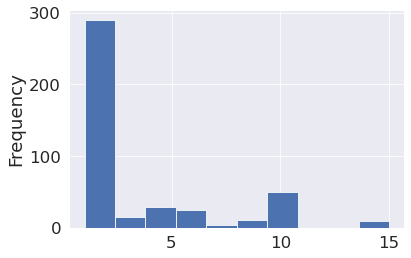

In [34]:
data["Klasa"].plot.hist()
plt.show()

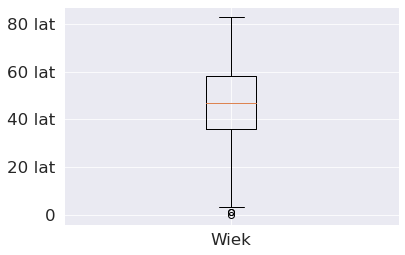

In [35]:
plt.boxplot(data["Age"])
plt.xticks([1], ["Wiek"])
plt.yticks([0,20,40,60,80],["0","20 lat","40 lat","60 lat","80 lat"])
plt.show()

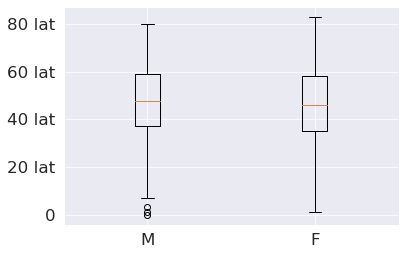

In [36]:
plt.boxplot(data.Age[data.Sex=='M'] , positions=[0])
plt.boxplot(data.Age[data.Sex=='F'] , positions=[1])
plt.xticks([0,1], ["M","F"])
plt.yticks([0,20,40,60,80],["0","20 lat","40 lat","60 lat","80 lat"])
plt.show()

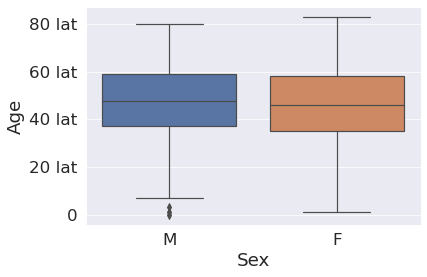

In [37]:
sns.boxplot(data=data, x="Sex", y="Age")
plt.yticks([0,20,40,60,80],["0","20 lat","40 lat","60 lat","80 lat"])
plt.show()

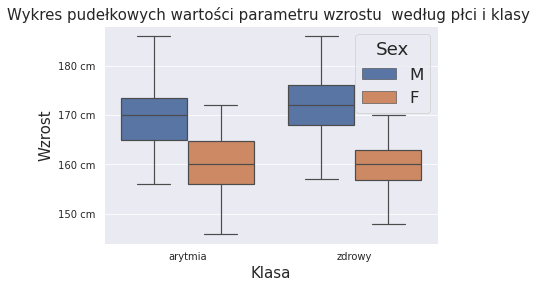

In [43]:
b = sns.boxplot(data=data,x='klasa',y="Height (cm)",hue='Sex',showfliers=False)
b.axes.set_title("Wykres pudełkowych wartości parametru wzrostu  według płci i klasy ",fontsize=15)
b.set_xlabel("Klasa",fontsize=15)
b.set_ylabel("Wzrost",fontsize=15)
b.tick_params(labelsize=10)
plt.yticks([150,160,170,180],["150 cm","160 cm","170 cm","180 cm"])
plt.show()

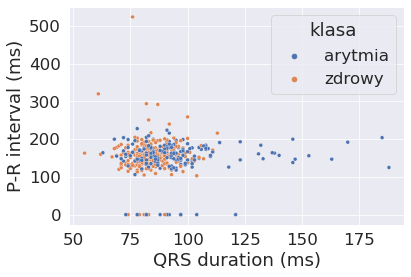

In [39]:
sns.scatterplot(data=data, x="QRS duration (ms)", y="P-R interval (ms)", hue="klasa", s=15)
plt.show()

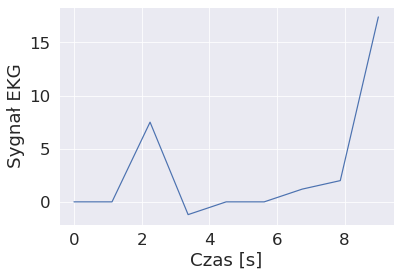

In [40]:
x=np.array(data.iloc[3][39:48])
x=x.T
y=np.linspace(0,len(x),len(x))
plt.xlabel("Czas [s]")
plt.ylabel("Sygnał EKG")
plt.plot(y,x)

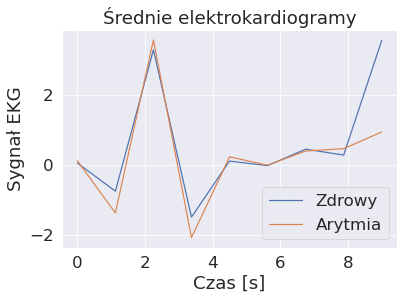

In [41]:
data_zdrowy=np.array(data.iloc[:,39:48][data.klasa=="zdrowy"]).T
data_arytmia=np.array(data.iloc[:,39:48][data.klasa=="arytmia"]).T
x1=np.mean(data_zdrowy, axis=1)
x2=np.mean(data_arytmia, axis=1)

t=np.linspace(0,len(x2),len(x2))
plt.plot(t,x1,label="Zdrowy")
plt.plot(t,x2,label="Arytmia")
plt.legend()
plt.xlabel("Czas [s]")
plt.ylabel("Sygnał EKG")
plt.title("Średnie elektrokardiogramy")
plt.show()

Dosłowne combo biblioteki matplotlib, pandas i seaborn gdzie badaliśmy EKG pacjentów. Biblioteki te bardzo się przydały aby móc szczegółowo sprawdzić badaną grupe ludzi. 

# Zadanie 6

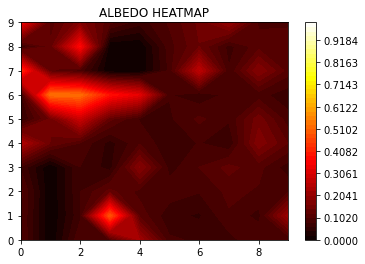

In [12]:
tab_albedo=np.genfromtxt("dane.txt",delimiter='\t')
tab_albedo[np.isnan(tab_albedo)] = 0
len(tab_albedo)

X, Y = np.meshgrid(np.linspace(0, 9, 10), np.linspace(0, 9, 10))

Z = tab_albedo


levels = np.linspace(0,1)

fig=plt.figure()
a = plt.contourf(X,Y,Z,levels,cmap='hot')
plt.colorbar()



plt.title('ALBEDO HEATMAP')
fig.figsize=(15,10)
plt.axis([0,9,0,9])
plt.savefig("mapka1.png")
plt.show()

Tu jest mój projekt na jeden z przedmiotów gdzie miałem stworzyć mape albedo terenu Agh i Parku Jordana.

# Wnioski

Jedne z ciekawszych zajęć gdzie można było się bawić wizualizacją danych. Bardzo przyda się w przyszłej pracy inżynierskiej.

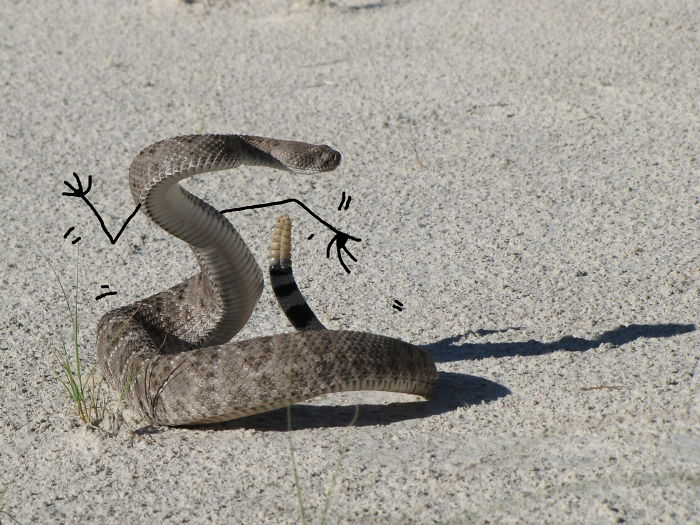